In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data_movies = pd.read_csv('ml-latest-small/movies.csv')
data_tages = pd.read_csv('ml-latest-small/tags.csv')
data_ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [3]:
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data_movies.movieId.value_counts(),print('Number of duplicated unique ids are: ',data_movies.movieId.duplicated().sum())

Number of duplicated unique ids are:  0


(movieId
 193609    1
 1         1
 2         1
 3         1
 4         1
          ..
 18        1
 19        1
 20        1
 21        1
 22        1
 Name: count, Length: 9742, dtype: int64,
 None)

In [5]:
data_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
data_ratings.movieId.value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
138966      1
140162      1
140737      1
140816      1
121169      1
Name: count, Length: 9724, dtype: int64

In [7]:
data_tages

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [8]:
data_ratings.movieId.value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
138966      1
140162      1
140737      1
140816      1
121169      1
Name: count, Length: 9724, dtype: int64

In [9]:
data_ratings = data_ratings[data_ratings['rating'] >= 3.5]

In [10]:
merge = data_movies.merge(data_ratings,on = 'movieId',how = 'inner')

In [11]:
merge

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
...,...,...,...,...,...,...
61711,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
61712,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
61713,193585,Flint (2017),Drama,184,3.5,1537109805
61714,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [12]:
merge.drop(columns=['rating','timestamp','genres'],inplace=True)

In [13]:
merge

,movieId,title,userId
0,1,Toy Story (1995),1
1,1,Toy Story (1995),5
2,1,Toy Story (1995),7
3,1,Toy Story (1995),17
4,1,Toy Story (1995),18
...,...,...,...
61711,193581,Black Butler: Book of the Atlantic (2017),184
61712,193583,No Game No Life: Zero (2017),184
61713,193585,Flint (2017),184
61714,193587,Bungo Stray Dogs: Dead Apple (2018),184


In [14]:
len(merge.userId.unique()) 

609

In [15]:
merge_list = merge.groupby(by = ["userId"])["title"].apply(list).reset_index()
merge_list.head()

,userId,title
0,1,"[Toy Story (1995), Grumpier Old Men (1995), He..."
1,2,"[Tommy Boy (1995), Good Will Hunting (1997), G..."
2,3,"[Escape from L.A. (1996), Highlander (1986), C..."
3,4,"[Nobody Loves Me (Keiner liebt mich) (1994), F..."
4,5,"[Toy Story (1995), Get Shorty (1995), Babe (19..."


In [16]:
merge_list = merge_list["title"].tolist()
merge_list[0:3]

[['Toy Story (1995)',
  'Grumpier Old Men (1995)',
  'Heat (1995)',
  'Seven (a.k.a. Se7en) (1995)',
  'Usual Suspects, The (1995)',
  'Bottle Rocket (1996)',
  'Braveheart (1995)',
  'Rob Roy (1995)',
  'Canadian Bacon (1995)',
  'Desperado (1995)',
  'Billy Madison (1995)',
  'Dumb & Dumber (Dumb and Dumber) (1994)',
  'Ed Wood (1994)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Tommy Boy (1995)',
  'Clear and Present Danger (1994)',
  'Forrest Gump (1994)',
  'Jungle Book, The (1994)',
  'Mask, The (1994)',
  'Dazed and Confused (1993)',
  'Fugitive, The (1993)',
  'Jurassic Park (1993)',
  "Schindler's List (1993)",
  'So I Married an Axe Murderer (1993)',
  'Three Musketeers, The (1993)',
  'Tombstone (1993)',
  'Dances with Wolves (1990)',
  'Batman (1989)',
  'Silence of the Lambs, The (1991)',
  'Pinocchio (1940)',
  'Fargo (1996)',
  'James and the Giant Peach (1996)',
  'Rock, The (1996)',
  "She's the One (1996)",
  'Wizard of Oz, The (1939)',
  'Citizen Kane (1941)',

In [17]:
len(merge.userId.unique())

609

In [18]:
len(merge_list)

609

In [19]:

from mlxtend.preprocessing import TransactionEncoder
#
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [20]:
df.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Years a Slave (2013),127 Hours (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Hours (2016),13 Sins (2014),13 Tzameti (2005),13th (2016),"13th Warrior, The (1999)",1408 (2007),15 Minutes (2001),16 Blocks (2006),17 Again (2009),1776 (1972),187 (One Eight Seven) (1997),1900 (Novecento) (1976),1941 (1979),1984 (Nineteen Eighty-Four) (1984),2 Days in Paris (2007),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2 Guns (2013),20 Dates (1998),20 Feet from Stardom (Twenty Feet from Stardom) (2013),20 Million Miles to Earth (1957),"20,000 Days on Earth (2014)","20,000 Leagues Under the Sea (1916)","20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001 Maniacs (2005),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),2046 (2004),2048: Nowhere to Run (2017),21 (2008),21 Grams (2003),21 Jump Street (2012),21 Up (1977),21 and Over (2013),22 Jump Street (2014),24 Hour Party People (2002),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Up (1985),28 Weeks Later (2007),3 Extremes (Three... Extremes) (Saam gaang yi) (2004),3 Idiots (2009),3 Ninjas (1992),3 Ninjas: High Noon On Mega Mountain (1998),3 Women (Three Women) (1977),3-Iron (Bin-jip) (2004),30 Days of Night (2007),30 Minutes or Less (2011),300 (2007),3000 Miles to Graceland (2001),300: Rise of an Empire (2014),31 (2016),35 Up (1991),"39 Steps, The (1935)",3:10 to Yuma (1957),3:10 to Yuma (2007),4 Little Girls (1997),"4 Months, 3 Weeks and 2 Days (4 luni, 3 saptamâni si 2 zile) (2007)",40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",42 (2013),42 Up (1998),42nd Street (1933),47 Ronin (2013),48 Hrs. (1982),49 Up (2005),5 Centimeters per Second (Byôsoku 5 senchimêtoru) (2007),"5,000 Fingers of Dr. T, The (1953)",50 First Dates (2004),50/50 (2011),52 Pick-Up (1986),6 Days to Air: The Making of South Park (2011),61* (2001),"6th Day, The (2000)",7 Days in Hell (2015),7 Faces of Dr. Lao (1964),"7th Voyage of Sinbad, The (1958)",8 1/2 (8½) (1963),8 Heads in a Duffel Bag (1997),8 Mile (2002),8 Seconds (1994),8 Women (2002),8 ½ Women (a.k.a. 8 1/2 Women) (a.k.a. Eight and a Half Women) (1999),84 Charing Cross Road (1987),8MM (1999),9 (2009),9 1/2 Weeks (Nine 1/2 Weeks) (1986),9/11 (2002),99 francs (2007),9to5: Days in Porn (a.k.a. 9 to 5: Days in Porn) (2008),A Bad Moms Christmas (2017),A Cosmic Christmas (1977),A Detective Story (2003),A Dog's Purpose (2017),A Flintstones Christmas Carol (1994),A Home at the End of the World (2004),A Man from Boulevard des Capucines (1987),A Midsummer Night's Dream (2016),A Million Ways to Die in the West (2014),A Most Wanted Man (2014),A Perfect Day (2015),A Pigeon Sat on a Branch Reflecting on Existence (2014),A Plasticine Crow (1981),A Quiet Place (2018),A Silent Voice (2016),A Story of Children and Film (2013),A Street Cat Named Bob (2016),A Walk in the Woods (2015),"A-Team, The (2010)",A.I. Artificial Intelligence (2001),"ABCs of Death, The (2012)",ARQ (2016),AVP: Alien vs. Predator (2004),AVPR: Aliens vs. Predator - Requiem (2007),Abbott and Costello Me

In [21]:
df.shape

(609, 7359)

In [ ]:
from mlxtend.frequent_patterns import apriori
%time
apriori_frequent_itemsets = apriori(df, min_support=0.01,use_colnames=True,max_len=2)

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 6.2 μs


In [ ]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

itemsets
2    213544
1      1889
Name: count, dtype: int64

# FP-Growth

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head()

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 7.15 μs


,support,itemsets
0,0.453202,(Forrest Gump (1994))
1,0.394089,"(Matrix, The (1999))"
2,0.392447,"(Silence of the Lambs, The (1991))"
3,0.361248,(Star Wars: Episode IV - A New Hope (1977))
4,0.321839,(Fight Club (1999))


In [ ]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

itemsets
2    213544
1      1889
Name: count, dtype: int64

In [ ]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

,support,itemsets,length
0,0.453202,(Forrest Gump (1994)),1
1,0.394089,"(Matrix, The (1999))",1
2,0.392447,"(Silence of the Lambs, The (1991))",1
3,0.361248,(Star Wars: Episode IV - A New Hope (1977)),1
4,0.321839,(Fight Club (1999)),1
...,...,...,...
215428,0.011494,"(Cape Fear (1962), Manchurian Candidate, The (...",2
215429,0.011494,"(Graduate, The (1967), Cape Fear (1962))",2
215430,0.011494,"(Sicario (2015), Dark Knight, The (2008))",2
215431,0.011494,"(Sicario (2015), Usual Suspects, The (1995))",2


In [ ]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] > 1)
                          & (fpgrowth_frequent_itemsets['support'] > 0.06)].head()


,support,itemsets,length
1889,0.310345,"(Shawshank Redemption, The (1994), Forrest Gum...",2
1890,0.243021,"(Forrest Gump (1994), Matrix, The (1999))",2
1891,0.241379,"(Shawshank Redemption, The (1994), Matrix, The...",2
1892,0.234811,"(Pulp Fiction (1994), Matrix, The (1999))",2
1893,0.238095,"(Silence of the Lambs, The (1991), Forrest Gum...",2


In [ ]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] != 1)]

,support,itemsets,length
1889,0.310345,"(Shawshank Redemption, The (1994), Forrest Gum...",2
1890,0.243021,"(Forrest Gump (1994), Matrix, The (1999))",2
1891,0.241379,"(Shawshank Redemption, The (1994), Matrix, The...",2
1892,0.234811,"(Pulp Fiction (1994), Matrix, The (1999))",2
1893,0.238095,"(Silence of the Lambs, The (1991), Forrest Gum...",2
...,...,...,...
215428,0.011494,"(Cape Fear (1962), Manchurian Candidate, The (...",2
215429,0.011494,"(Graduate, The (1967), Cape Fear (1962))",2
215430,0.011494,"(Sicario (2015), Dark Knight, The (2008))",2
215431,0.011494,"(Sicario (2015), Usual Suspects, The (1995))",2


In [ ]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'] == {'Step Brothers (2008)', 'Corpse Bride (2005)'}]

,support,itemsets,length


In [ ]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: 'Spider-Man (2002)' in str(x))]

,support,itemsets,length
379,0.139573,(Spider-Man (2002)),1
3381,0.037767,"(Spider-Man (2002), L.A. Confidential (1997))",2
3497,0.041051,"(Spider-Man (2002), Batman (1989))",2
3574,0.050903,"(Being John Malkovich (1999), Spider-Man (2002))",2
3695,0.049261,"(Spider-Man (2002), Office Space (1999))",2
...,...,...,...
214369,0.018062,"(Spider-Man (2002), I Heart Huckabees (2004))",2
214684,0.011494,"(Brick (2005), Spider-Man (2002))",2
214904,0.011494,"(Spider-Man (2002), Family Guy Presents Stewie...",2
215092,0.013136,"(Spider-Man (2002), Saved! (2004))",2


support     float64
itemsets     object
length        int64
dtype: object
    support                                     itemsets  length
0  0.453202                        (Forrest Gump (1994))       1
1  0.394089                         (Matrix, The (1999))       1
2  0.392447           (Silence of the Lambs, The (1991))       1
3  0.361248  (Star Wars: Episode IV - A New Hope (1977))       1
4  0.321839                          (Fight Club (1999))       1
    support  length
0  0.453202       1
1  0.394089       1
2  0.392447       1
3  0.361248       1
4  0.321839       1


<Axes: >

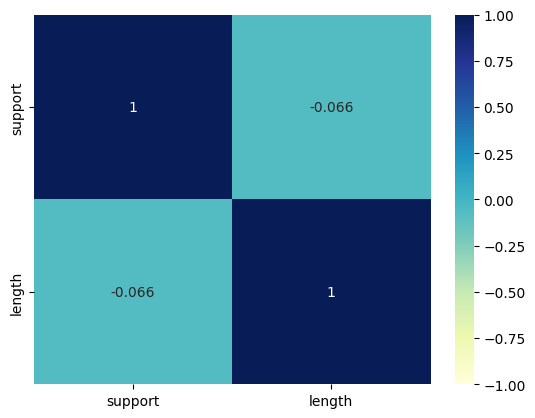

In [ ]:

import seaborn as sns
print(fpgrowth_frequent_itemsets.dtypes)
print(fpgrowth_frequent_itemsets.head())
numeric_columns = fpgrowth_frequent_itemsets.select_dtypes(include=['float64', 'int64'])
print(numeric_columns.head())
correlation_matrix = numeric_columns.corr(method='spearman')
sns.heatmap(data=correlation_matrix,
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap='YlGnBu')

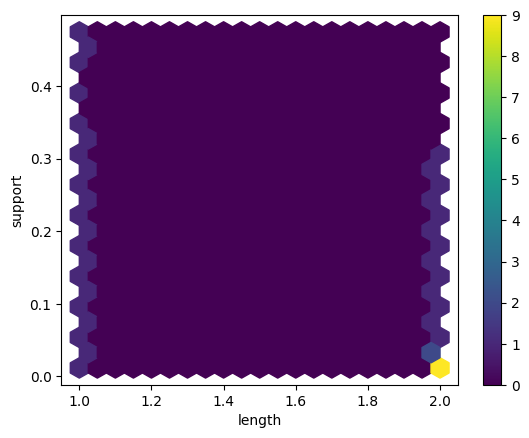

In [ ]:
fpgrowth_frequent_itemsets.plot.hexbin(x='length',y='support',cmap='viridis',gridsize=20,sharex=False,bins=10);

# ASSOCIATION RULES

In [ ]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=0.01)
rules

CPU times: user 2.14 s, sys: 101 ms, total: 2.24 s
Wall time: 2.25 s


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Shawshank Redemption, The (1994))",(Forrest Gump (1994)),0.474548,0.453202,0.310345,0.653979,1.443019,0.095279,1.580246,0.584276
1,(Forrest Gump (1994)),"(Shawshank Redemption, The (1994))",0.453202,0.474548,0.310345,0.684783,1.443019,0.095279,1.666950,0.561466
2,(Forrest Gump (1994)),"(Matrix, The (1999))",0.453202,0.394089,0.243021,0.536232,1.360688,0.064420,1.306496,0.484782
3,"(Matrix, The (1999))",(Forrest Gump (1994)),0.394089,0.453202,0.243021,0.616667,1.360688,0.064420,1.426430,0.437486
4,"(Shawshank Redemption, The (1994))","(Matrix, The (1999))",0.474548,0.394089,0.241379,0.508651,1.290701,0.054365,1.233158,0.428635
...,...,...,...,...,...,...,...,...,...,...
427083,"(Dark Knight, The (2008))",(Sicario (2015)),0.224959,0.013136,0.011494,0.051095,3.889599,0.008539,1.040003,0.958535
427084,(Sicario (2015)),"(Usual Suspects, The (1995))",0.013136,0.285714,0.011494,0.875000,3.062500,0.007741,5.714286,0.682434
427085,"(Usual Suspects, The (1995))",(Sicario (2015)),0.285714,0.013136,0.011494,0.040230,3.062500,0.007741,1.028229,0.942857
427086,(Sicario (2015)),(Fight Club (1999)),0.013136,0.321839,0.011494,0.875000,2.718750,0.007266,5.425287,0.640599


In [ ]:
rules[rules["antecedents"].apply(lambda x: "Spider-Man (2002)" in str(x))].sort_values(ascending=False,by='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
343864,(Spider-Man (2002)),(Top Secret! (1984)),0.139573,0.016420,0.014778,0.105882,6.448235,0.012486,1.100056,0.981976
404768,(Spider-Man (2002)),(Superman Returns (2006)),0.139573,0.014778,0.013136,0.094118,6.368627,0.011074,1.087582,0.979723
225088,(Spider-Man (2002)),(Fracture (2007)),0.139573,0.014778,0.013136,0.094118,6.368627,0.011074,1.087582,0.979723
375084,(Spider-Man (2002)),(Hulk (2003)),0.139573,0.013136,0.011494,0.082353,6.269118,0.009661,1.075428,0.976827
104738,(Spider-Man (2002)),(Flags of Our Fathers (2006)),0.139573,0.013136,0.011494,0.082353,6.269118,0.009661,1.075428,0.976827
...,...,...,...,...,...,...,...,...,...,...
13668,(Spider-Man (2002)),(Tombstone (1993)),0.139573,0.077176,0.011494,0.082353,1.067084,0.000723,1.005642,0.073064
6546,(Spider-Man (2002)),(Clear and Present Danger (1994)),0.139573,0.103448,0.014778,0.105882,1.023529,0.000340,1.002722,0.026718
79110,(Spider-Man (2002)),(While You Were Sleeping (1995)),0.139573,0.082102,0.011494,0.082353,1.003059,0.000035,1.000274,0.003544
316631,(Spider-Man (2002)),(Crimson Tide (1995)),0.139573,0.106732,0.014778,0.105882,0.992036,-0.000119,0.999049,-0.009244


In [ ]:
rules[rules["antecedents"].apply(lambda x: "Superman (1978)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents       consequents                                            
(Superman (1978)) (Mad Max Beyond Thunderdome (1985))           10.410256
                  (Superman II (1980))                          10.104072
                  (Star Trek IV: The Voyage Home (1986))         8.408284
                  (Conan the Barbarian (1982))                   8.328205
                  (Rocketeer, The (1991))                        8.328205
                  (RoboCop (1987))                               7.596674
                  (Star Trek III: The Search for Spock (1984))   7.435897
                  (Halloween (1978))                             7.287179
                  (Karate Kid, The (1984))                       7.157051
                  (X-Files: Fight the Future, The (1998))        7.157051

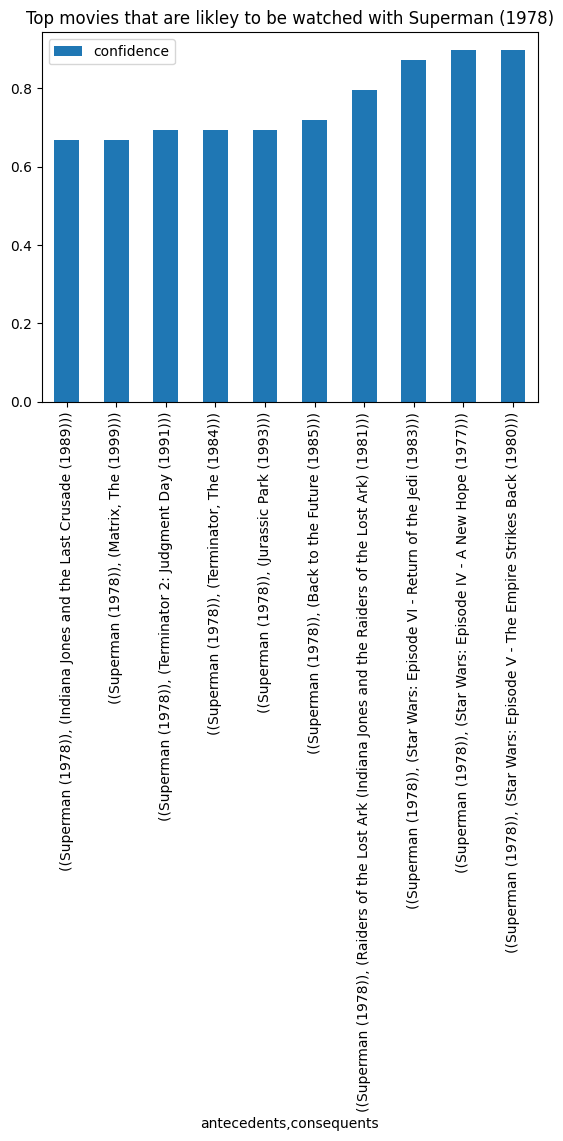

In [ ]:
rules[rules["antecedents"].apply(lambda x: "Superman (1978)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with Superman (1978)');